Loading required package: ggplot2


[1] 0.1383875
[1] 0.07188518
[1] 0.008609377
[1] 0.2593316


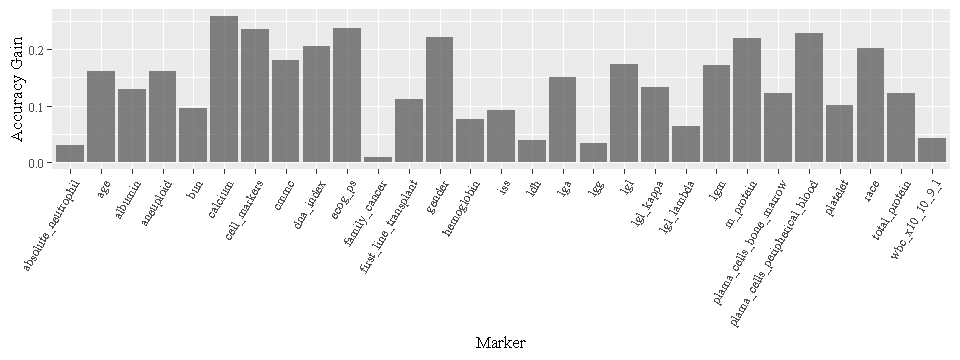

In [1]:
require(ggplot2)

df1 <- read.csv('output/brfl/clinical_and_gene_markers.csv', sep=',')

df2 <- read.csv('output/brfl/clinical_markers.csv', sep=',')

mg <- merge(df1, df2, by=c("feature", "fold"))

df <- data.frame(feature = mg$feature, 
                 diff = mg$accuracy.x - mg$accuracy.y,
                 fold = mg$fold)

result <- aggregate(diff ~ feature, data=df, FUN=mean)
colnames(result) <- c("feature", "mean")

tmp <- aggregate(diff ~ feature, data=df, FUN=sd)
colnames(tmp) <- c("feature", "sd")

result <- merge(result, tmp, by="feature")
result$feature = gsub('percent_', '', result$feature)
result <- result[result$mean > 0,]

p <- ggplot(result) + 
  geom_bar(aes(feature, mean), stat="identity", position="dodge", alpha=.75) + 
  # scale_x_discrete(limits = rev(levels(result$feature))) +
  theme(text = element_text(size=10, family="serif"), axis.text.x = element_text(angle=60, hjust=1)) + 
  xlab("Marker") + ylab("Accuracy Gain")

print(mean(result$mean))
print(sd(result$mean))
print(min(result$mean))
print(max(result$mean))

ggsave('images/accuracy_gain.pdf', p, units='cm', width=18, height=7)

options(repr.plot.width=8, repr.plot.height=3)
p

[1] 0.2329928
[1] 0.1021004
[1] 0.04179264
[1] 0.4104926


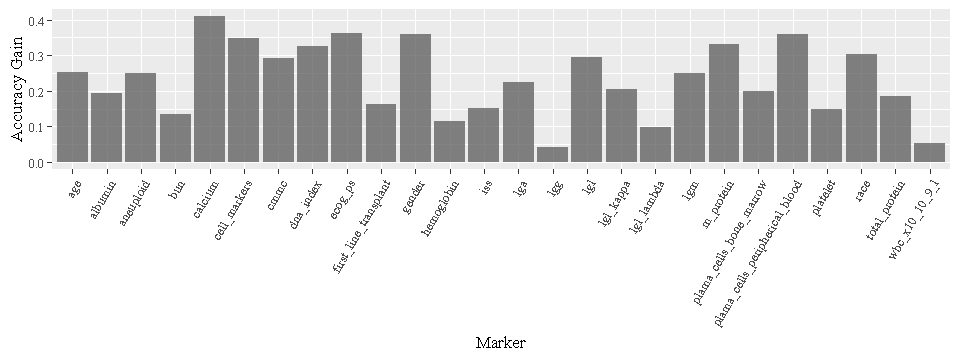

In [3]:
setwd('C:/Users/Venezian/git/multiple-myeloma/')

require(ggplot2)

df1 <- read.csv('output/brfl/clinical_and_gene_markers.csv', sep=',')

df2 <- read.csv('output/brfl/clinical_markers.csv', sep=',')

mg <- merge(df1, df2, by=c("feature", "fold"))

df <- data.frame(feature = mg$feature, 
                 diff = 1 - mg$accuracy.y / mg$accuracy.x,
                 fold = mg$fold)

result <- aggregate(diff ~ feature, data=df, FUN=mean)
colnames(result) <- c("feature", "mean")

tmp <- aggregate(diff ~ feature, data=df, FUN=sd)
colnames(tmp) <- c("feature", "sd")

result <- merge(result, tmp, by="feature")
result$feature = gsub('percent_', '', result$feature)
result <- result[result$mean > 0,]

p <- ggplot(result) + 
  geom_bar(aes(feature, mean), stat="identity", position="dodge", alpha=.75) + 
  # scale_x_discrete(limits = rev(levels(result$feature))) +
  theme(text = element_text(size=10, family="serif"), axis.text.x = element_text(angle=60, hjust=1)) + 
  xlab("Marker") + ylab("Accuracy Gain")

print(mean(result$mean))
print(sd(result$mean))
print(min(result$mean))
print(max(result$mean))

ggsave('images/accuracy_percentual_gain.pdf', p, units='cm', width=18, height=7)

options(repr.plot.width=8, repr.plot.height=3)
p